In [ ]:
!pip install NSFopen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 56.6 MB/s eta 0:00:00


In [ ]:
from NSFopen.read import read as afmreader

import os
from os import listdir
from os.path import isfile, join

import numpy as np
import math
import pprint
import collections
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

dirpath = os.getcwd()

# list all *.nid files
onlyfiles = [f for f in listdir(dirpath) if isfile(join(dirpath, f)) and f.split(".")[-1] == "nid"]

# list only files where there is "spectroscopy_" in the filename
force_files = [f for f in onlyfiles if "spectroscopy" in f.split("_")]

print(dirpath, "with", len(force_files)," *.nid force files:")
pprint(force_files)

/content with 0  *.nid force files:
[]


In [ ]:
filename = '/content/drive/Shareddrives/Physics Lab 3/AFM_Data/Spectroscopy/plastico azul line.nid'
alldata = afmreader(filename, verbose=False).data
params = afmreader(filename, verbose=False).param


filename_2 = '/content/drive/Shareddrives/Physics Lab 3/AFM_Data/Spectroscopy/plastico negro line.nid'
alldata_2 = afmreader(filename_2, verbose=False).data
params_2 = afmreader(filename_2, verbose=False).param

In [ ]:
adhesion_data = alldata['Spec']['Backward']['Deflection']
zaxis = alldata['Spec']['Backward']['Z-Axis']

adhesion_data_2 = alldata_2['Spec']['Backward']['Deflection']
zaxis_2 = alldata_2['Spec']['Backward']['Z-Axis']

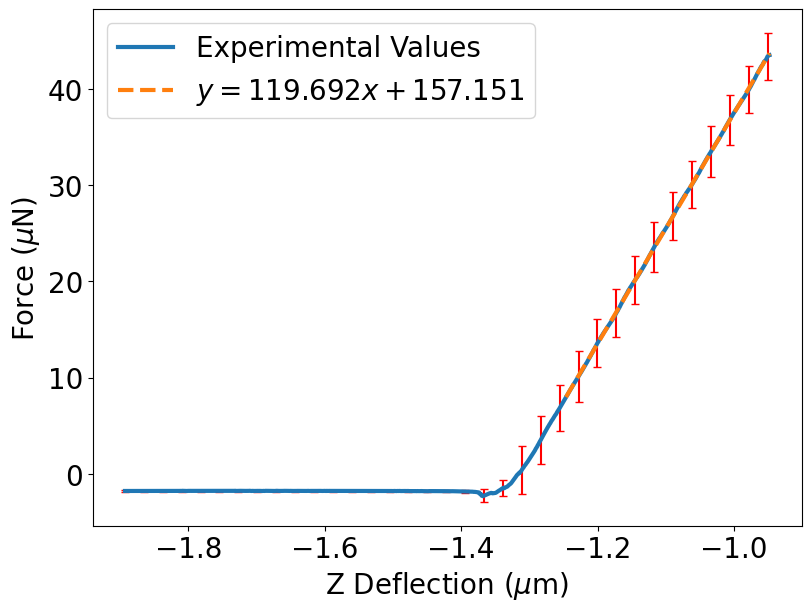

In [ ]:
font = {'size': 20}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(8,6), constrained_layout=True)

# Calculating the uncertainities
unc = []
for n in range(len(adhesion_data[0])):
    std_deviations = np.std([arr[n] for arr in adhesion_data])
    unc.append(std_deviations * 1e6)


average_zaxis = np.mean(zaxis, axis=0) * 1e6
average_adhesion = np.mean(adhesion_data, axis=0) * 1e6


plt.errorbar(average_zaxis, average_adhesion, yerr=unc, ecolor='r',
             errorevery=(0, 30), fmt='none', capsize=3)
plt.plot(average_zaxis, average_adhesion, label='Experimental Values', linewidth=3)

trigger = 700

a, b = np.polyfit(average_zaxis[trigger:], average_adhesion[trigger:], 1)
plt.plot(average_zaxis[trigger:], a*average_zaxis[trigger:]+b,
         linestyle='dashed', label=f'$y={round(a,3)}x+{round(b,3)}$', linewidth=3)


plt.xlabel('Z Deflection ($ \mu$m)')
plt.ylabel('Force ($ \mu$N)')
plt.legend()

fig.savefig('Silicon_Force_Distance_Curve.png', dpi=300)

plt.show()


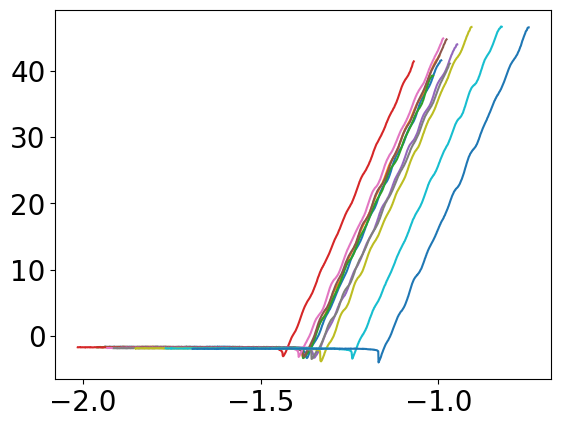

In [ ]:
adhesion_force = []

for i in range(len(adhesion_data)):
    plt.plot(zaxis[i]*1e6, adhesion_data[i]*1e6)
    adhesion_force.append(np.min(adhesion_data[i]*1e9))


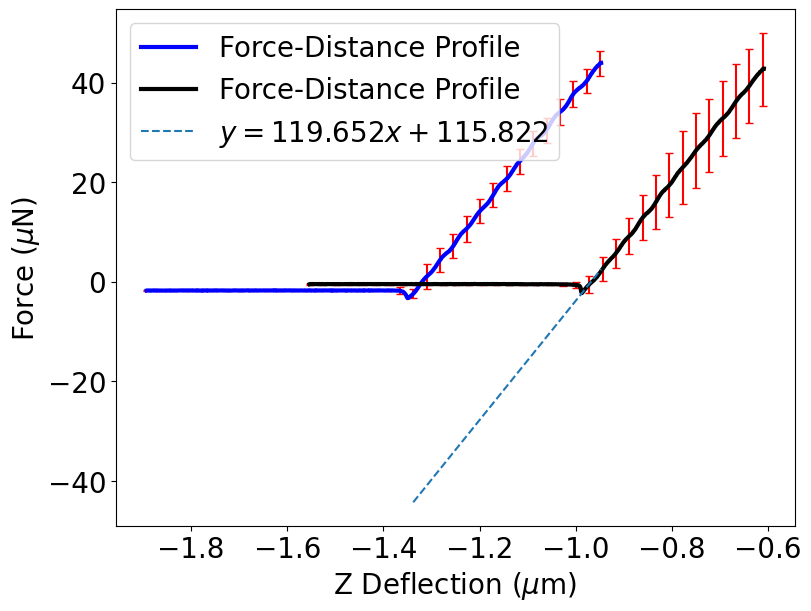

In [ ]:
font = {'size': 20}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(8,6), constrained_layout=True)


trial = 4

x = zaxis[trial]*1e6
y = adhesion_data[trial]*1e6

x_2 = zaxis_2[trial]*1e6
y_2 = adhesion_data_2[trial]*1e6

unc = []
for n in range(len(adhesion_data[0])):
    std_deviations = np.std([arr[n] for arr in adhesion_data])
    unc.append(std_deviations * 1e6)

plt.errorbar(x, y, yerr=unc, ecolor='r',
             errorevery=(0, 30), fmt='none', capsize=3)

unc_2 = []
for n in range(len(adhesion_data_2[0])):
    std_deviations_2 = np.std([arr[n] for arr in adhesion_data_2])
    unc_2.append(std_deviations_2 * 1e6)

plt.errorbar(x_2, y_2, yerr=unc_2, ecolor='r',
             errorevery=(0, 30), fmt='none', capsize=3)



plt.plot(x, y, label='Force-Distance Profile', c='blue', linewidth=3)
plt.plot(x_2, y_2, label='Force-Distance Profile', c='black', linewidth=3)


# trigger_1 = 600
# a_1, b_1 = np.polyfit(x[trigger_1:], y[trigger_1:], 1)
# plt.plot(x[trigger_1:], a_1*x[trigger_1:]+b_1, linestyle='dashed', c='orange', label=f'$y={round(a_1,3)}x+{round(b_1,3)}$')


trigger_2 = 600
a_2, b_2 = np.polyfit(x_2[trigger_2:], y_2[trigger_2:], 1)
plt.plot(x[trigger_2:], a_2*x[trigger_2:]+b_2, linestyle='dashed', label=f'$y={round(a_2,3)}x+{round(b_2,3)}$')


plt.xlabel('Z Deflection ($ \mu$m)')
plt.ylabel('Force ($ \mu$N)')
plt.legend()

fig.savefig('Plastic_Force_Distance_Cruves.png', dpi=300)

plt.show()


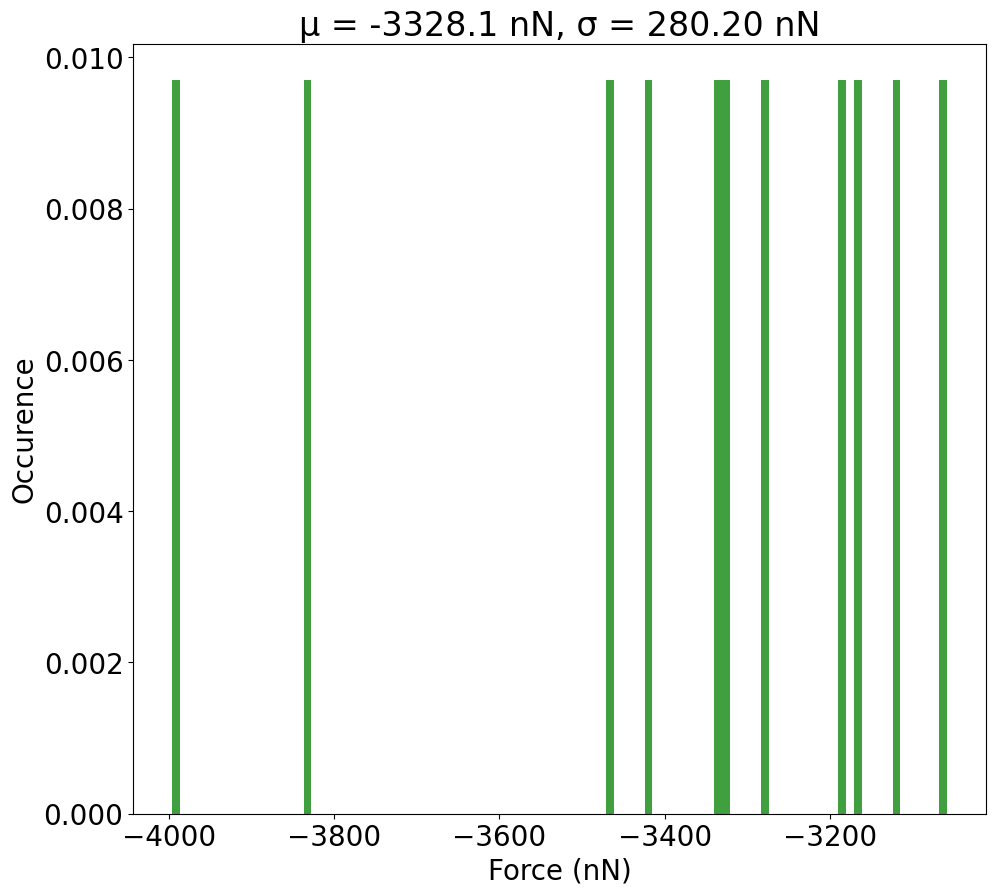

In [ ]:
med = np.median(adhesion_force)
stdev = np.std(adhesion_force)
n, bins, patches = plt.hist(adhesion_force, 100, density=True, facecolor='g', alpha=0.75)
plt.title('\u00B5 = {:.1f} nN, \u03C3 = {:.2f} nN'.format(med, stdev))
plt.xlabel('Force (nN)')
plt.ylabel('Occurence')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11, 10)
# fig.savefig('adhesion_dist.png', dpi=300)